In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
covid = pd.read_csv('C:\\Users\\arunc\\Desktop\\data cleaning\\covid_19_data.csv')

In [4]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
45174,45175,06/18/2020,Zacatecas,Mexico,2020-06-19 04:33:17,612.0,69.0,366.0
45175,45176,06/18/2020,Zakarpattia Oblast,Ukraine,2020-06-19 04:33:17,1882.0,51.0,772.0
45176,45177,06/18/2020,Zaporizhia Oblast,Ukraine,2020-06-19 04:33:17,541.0,16.0,375.0
45177,45178,06/18/2020,Zhejiang,Mainland China,2020-06-19 04:33:17,1269.0,1.0,1267.0
45178,45179,06/18/2020,Zhytomyr Oblast,Ukraine,2020-06-19 04:33:17,1154.0,21.0,583.0


In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45179 entries, 0 to 45178
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              45179 non-null  int64  
 1   ObservationDate  45179 non-null  object 
 2   Province/State   26150 non-null  object 
 3   Country/Region   45179 non-null  object 
 4   Last Update      45179 non-null  object 
 5   Confirmed        45179 non-null  float64
 6   Deaths           45179 non-null  float64
 7   Recovered        45179 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.8+ MB


In [7]:
covid.drop('SNo',axis=1,inplace=True)

In [8]:
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

In [12]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45179 entries, 2020-01-22 to 2020-06-18
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  26150 non-null  object 
 1   Country/Region  45179 non-null  object 
 2   Last Update     45179 non-null  object 
 3   Confirmed       45179 non-null  float64
 4   Deaths          45179 non-null  float64
 5   Recovered       45179 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.4+ MB


In [10]:
covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [11]:
covid = covid.set_index('ObservationDate')

In [13]:
datewise_covid = covid.groupby(['ObservationDate']).agg({'Confirmed': 'sum','Deaths':'sum','Recovered':'sum'})

In [14]:
datewise_covid.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


Text(0.5, 1.0, 'Datewise Confirmed Cases')

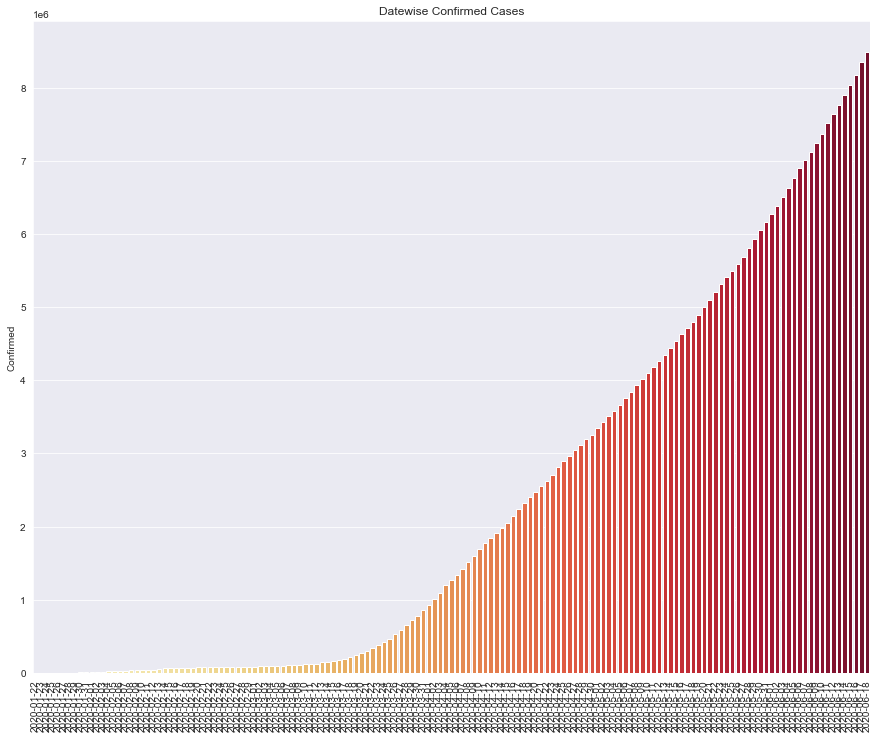

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,12))
sns.barplot(x = datewise_covid.index.date,y = datewise_covid['Confirmed'],palette='YlOrRd')
plt.xticks(rotation=90)
plt.title('Datewise Confirmed Cases')

In [16]:
#A mortality rate is a measure of the frequency of occurrence of death in a defined population during a specified interval.
datewise_covid['Mortality Rate'] = (datewise_covid['Deaths']/datewise_covid['Confirmed'])*100

In [17]:
datewise_covid.head()

,Confirmed,Deaths,Recovered,Mortality Rate
ObservationDate,,,,
2020-01-22,555.0,17.0,28.0,3.063063
2020-01-23,653.0,18.0,30.0,2.756508
2020-01-24,941.0,26.0,36.0,2.763018
2020-01-25,1438.0,42.0,39.0,2.920723
2020-01-26,2118.0,56.0,52.0,2.644004


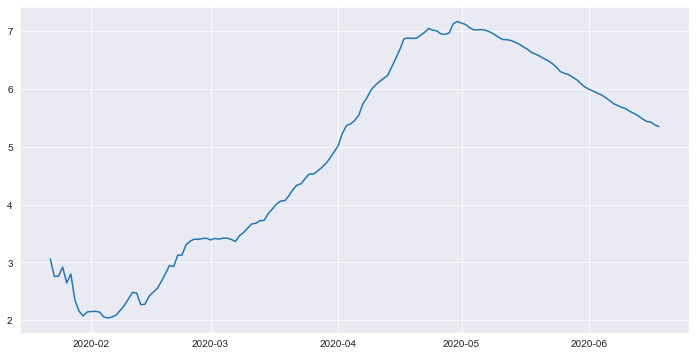

In [18]:
plt.figure(figsize=(12,6))
plt.plot(datewise_covid['Mortality Rate'],label="Mortality Rate")
#plt.xticks(rotation=90)
plt.show()

In [19]:
India_data = covid[covid['Country/Region']=='India']

In [20]:
datewise_india = India_data.groupby(['ObservationDate']).agg({'Confirmed': 'sum','Deaths':'sum','Recovered':'sum'})

In [21]:
datewise_india.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,1.0,0.0,0.0
2020-01-31,1.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0


In [22]:
datewise_india['Mortality Rate'] = (datewise_india['Deaths']/datewise_india['Confirmed'])*100

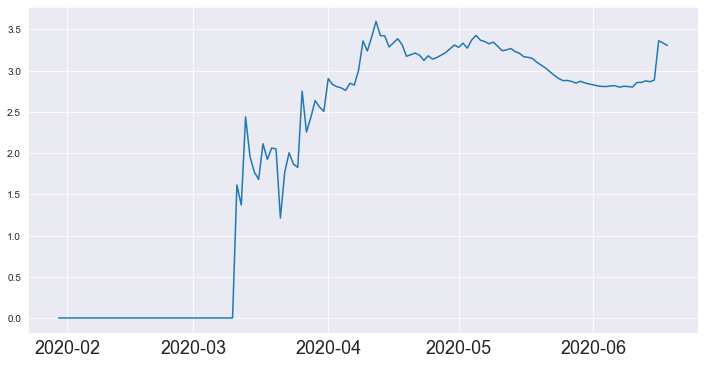

In [23]:
plt.figure(figsize=(12,6))
plt.plot(datewise_india['Mortality Rate'],label="Mortality Rate")
plt.xticks(fontsize=18)
plt.show()

In [24]:
datewise_india['Recovery Rate'] = (datewise_india['Recovered']/datewise_india['Confirmed'])*100

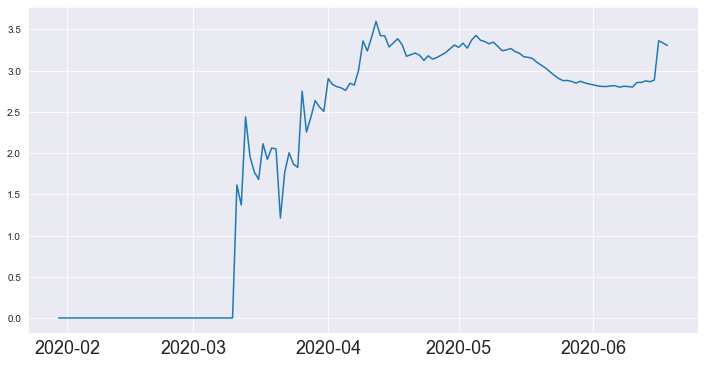

In [25]:
plt.figure(figsize=(12,6))
plt.plot(datewise_india['Mortality Rate'],label="Mortality Rate")
plt.xticks(fontsize=18)
plt.show()

In [26]:
datewise_india['Recovery Rate'] = (datewise_india['Recovered']/datewise_india['Confirmed'])*100

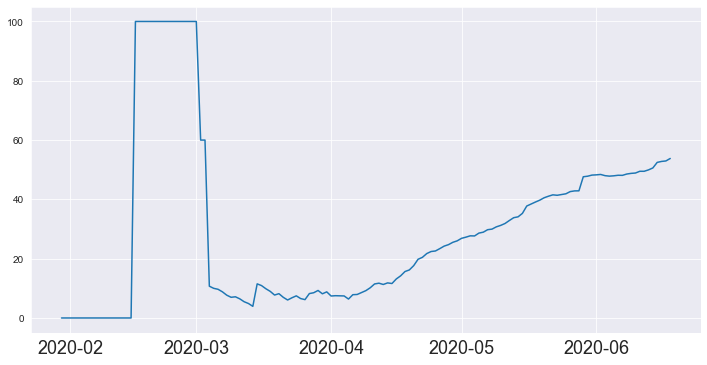

In [27]:
plt.figure(figsize=(12,6))
plt.plot(datewise_india['Recovery Rate'],label="Recovery Rate")
plt.xticks(fontsize=18)
plt.show()

<AxesSubplot:xlabel='ObservationDate'>

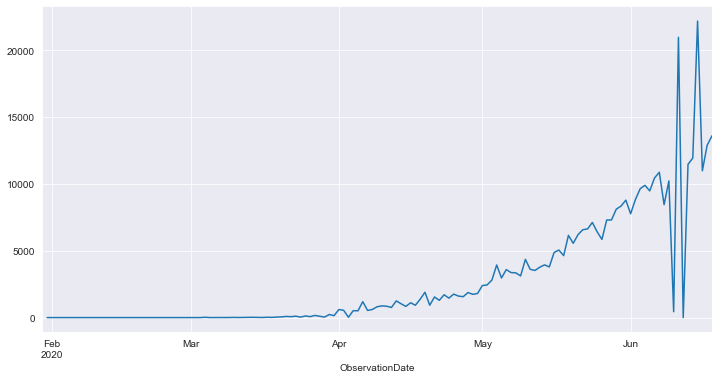

In [28]:
plt.figure(figsize=(12,6))
datewise_india['Confirmed'].diff().plot()

<AxesSubplot:xlabel='ObservationDate'>

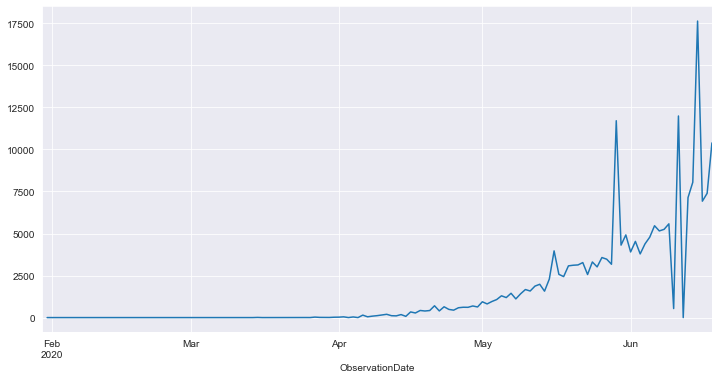

In [29]:
plt.figure(figsize=(12,6))
datewise_india['Recovered'].diff().plot()

<AxesSubplot:xlabel='ObservationDate'>

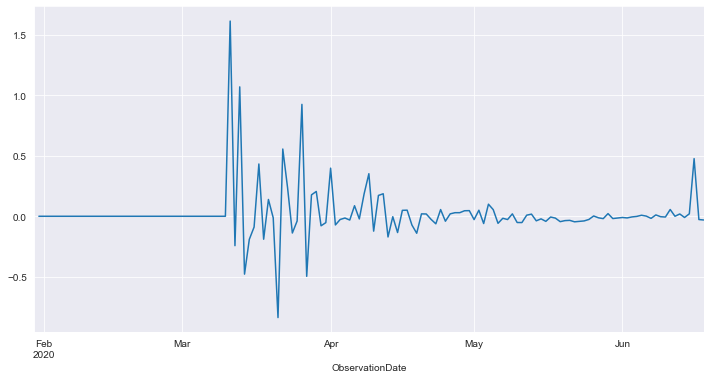

In [30]:
plt.figure(figsize=(12,6))
datewise_india['Mortality Rate'].diff().plot()

<AxesSubplot:xlabel='ObservationDate'>

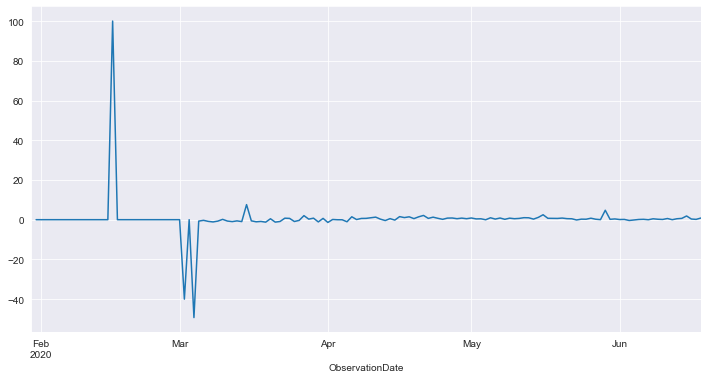

In [31]:
plt.figure(figsize=(12,6))
datewise_india['Recovery Rate'].diff().plot()